In [ ]:
## Predictive Modelling on US Labor dataset 
{Ref: Analytics Vidhya Blog}

In [1]:
import numpy as np

import matplotlib as plt

import pandas as pd

from sklearn import datasets

from sklearn import metrics

from sklearn.linear_model import LogisticRegression


In [2]:
train = pd.read_csv('C:/Users/abagchee/Desktop/AV_Tasks/PredictiveModelling Workshop/train.csv')
test = pd.read_csv('C:/Users/abagchee/Desktop/AV_Tasks/PredictiveModelling Workshop/test.csv')

In [3]:
#Univariate Analysis
train.dtypes


ID                 int64
Age                int64
Workclass         object
Education         object
Marital.Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Hours.Per.Week     int64
Native.Country    object
Income.Group      object
dtype: object

In [4]:
#In case of continuous variables, we generally measure central tendency and spread of data such as Median, Mean, Range
# IQR, Std Dev. Python dataframes have an inbuit routine called 'describe' which does the job.
train.describe()


,ID,Age,Hours.Per.Week
count,32561.000000,32561.000000,32561.000000
mean,16281.000000,38.581647,40.437456
std,9399.695394,13.640433,12.347429
min,1.000000,17.000000,1.000000
25%,8141.000000,28.000000,40.000000
50%,16281.000000,37.000000,40.000000
75%,24421.000000,48.000000,45.000000
max,32561.000000,90.000000,99.000000


In [5]:
#For categorical variables, we generally use frequency tables to understand distribution of each category. It can be
# measured using two metrics Count and Count% against each category.

#Step 1: Get a list of categorical variables
categorical_variables = train.dtypes.loc[train.dtypes=='object'].index
print (categorical_variables)

#Step 2 Use the apply function in pyhton to determine the number of unique values in each column

train[categorical_variables].apply(lambda x: len(x.unique()))

Index(['Workclass', 'Education', 'Marital.Status', 'Occupation',
       'Relationship', 'Race', 'Sex', 'Native.Country', 'Income.Group'],
      dtype='object')


Workclass          9
Education         16
Marital.Status     7
Occupation        15
Relationship       6
Race               5
Sex                2
Native.Country    42
Income.Group       2
dtype: int64

In [6]:
# print the counts of each category
train['Race'].value_counts()

# print the percentage of observations in each category
train['Race'].value_counts()/train.shape[0]

White                 0.854274
Black                 0.095943
Asian-Pac-Islander    0.031909
Amer-Indian-Eskimo    0.009551
Other                 0.008323
Name: Race, dtype: float64

In [7]:
train['Native.Country'].value_counts()/train.shape[0]

United-States                 0.895857
Mexico                        0.019748
Philippines                   0.006081
Germany                       0.004207
Canada                        0.003716
Puerto-Rico                   0.003501
El-Salvador                   0.003255
India                         0.003071
Cuba                          0.002918
England                       0.002764
Jamaica                       0.002488
South                         0.002457
China                         0.002303
Italy                         0.002242
Dominican-Republic            0.002150
Vietnam                       0.002058
Guatemala                     0.001966
Japan                         0.001904
Poland                        0.001843
Columbia                      0.001812
Taiwan                        0.001566
Haiti                         0.001351
Iran                          0.001321
Portugal                      0.001136
Nicaragua                     0.001044
Peru                     

In [8]:
# multi-variate analysis finds out the relationship between 2 or more variables. Here we look for association
# and dis-association between variables at a pre-defined significance level
# The type of visualization technique to use depends on type of each variable. There can be 3 combinations.

# 1. Both Categorical : cross-tabulation or confusion-matrix
ct = pd.crosstab(train['Sex'],train['Income.Group'],margins=True)
print (ct)

Income.Group  <=50K  >50K    All
Sex                             
Female         9592  1179  10771
Male          15128  6662  21790
All           24720  7841  32561


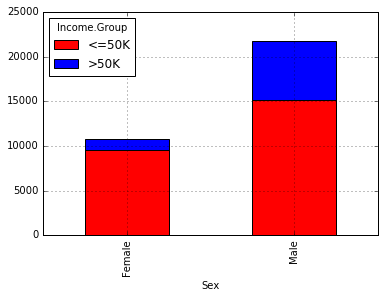

In [9]:
# use standard chart for viz
%matplotlib inline
ct.iloc[:-1,:-1].plot(kind='bar',stacked=True,color=['red','blue'],grid=True)

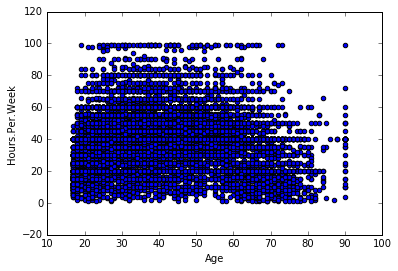

In [10]:
# Above bar chart can help us making decisions like ~15% of females are in >50k income group
# 2. Both Continous : for both continous we use scatter chart to make interpretations.
train.plot('Age','Hours.Per.Week',kind='scatter')

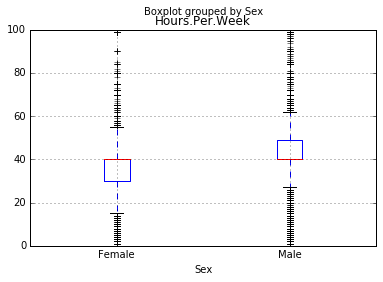

In [11]:
# 3. Categorical-Continuous combination: for this we generally make box-plots for each category. they directly show if
# there is a significance difference or not.
train.boxplot(column='Hours.Per.Week',by='Sex')

In [12]:
# Need to understand how to interpret a box-plot

# Missing Values Treatment
# 1. checking the missing values in training data:
train.apply(lambda x: sum(x.isnull()))

ID                   0
Age                  0
Workclass         1836
Education            0
Marital.Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Hours.Per.Week       0
Native.Country     583
Income.Group         0
dtype: int64

In [13]:
test.apply(lambda x:sum(x.isnull()))

ID                  0
Age                 0
Workclass         963
Education           0
Marital.Status      0
Occupation        966
Relationship        0
Race                0
Sex                 0
Hours.Per.Week      0
Native.Country    274
dtype: int64

In [15]:
from scipy.stats import mode
mode(train['Workclass'],axis=None,nan_policy='propagate')

In [17]:
# In both the train and test data we have 3 columns containing null values and they are all categorical. For categorical
# we use mode imputation to fill null values.
# To impute with mode, we will use scipy lib function mode to do the job


var_to_impute = ['Workclass','Occupation','Native.Country']
for var in var_to_impute:
    train[var].fillna(mode(train[var]).mode[0],inplace=True)
    train[var].fillna(mode(test[var]).mode[0],inplace=True)

In [18]:
# Now check the missing values again to confirm
train.apply(lambda x:sum(x.isnull()))

ID                   0
Age                  0
Workclass         1836
Education            0
Marital.Status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Hours.Per.Week       0
Native.Country     583
Income.Group         0
dtype: int64